In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from src.io_data_model import (
    load_and_dateindex_data,
)

from src.transformation import (
    clean_production_data,
)

In [3]:
from sunflower_production_parms import config

CROP = config["CROP"]
DATA_FILE = config["DATA_FILE"]
DATA_FILE_PATH = config["DATA_FILE_PATH"]
MODEL_FILE = config["MODEL_FILE"]
MODEL_PATH = config["MODEL_PATH"]
TARGET_VARIABLE = config["TARGET_VARIABLE"]
YEAR = config["YEAR"]

In [4]:
indexed_df = load_and_dateindex_data(DATA_FILE_PATH, DATA_FILE)
cleaned_df = clean_production_data(indexed_df, TARGET_VARIABLE, CROP, YEAR)
cleaned_df.tail(9)

,Province,Production (Tonnes)
Date,,
2024-01-01,Eastern Cape,1000
2024-01-01,Western Cape,0
2024-01-01,Northern Cape,4000
2024-01-01,Free State,357000
2024-01-01,Kwazulu-Natal,0
2024-01-01,Mpumalanga,4000
2024-01-01,Limpopo,63000
2024-01-01,Gauteng,3000
2024-01-01,North West,201000


In [5]:
# Get summary statistics
cleaned_df.describe().map(lambda x: f"{x:,.0f}")

,Production (Tonnes)
count,306
mean,"72,000"
std,"124,405"
min,0
25%,0
50%,"5,000"
75%,"75,750"
max,"629,000"


<Axes: xlabel='Date', ylabel='Production (Tonnes)'>

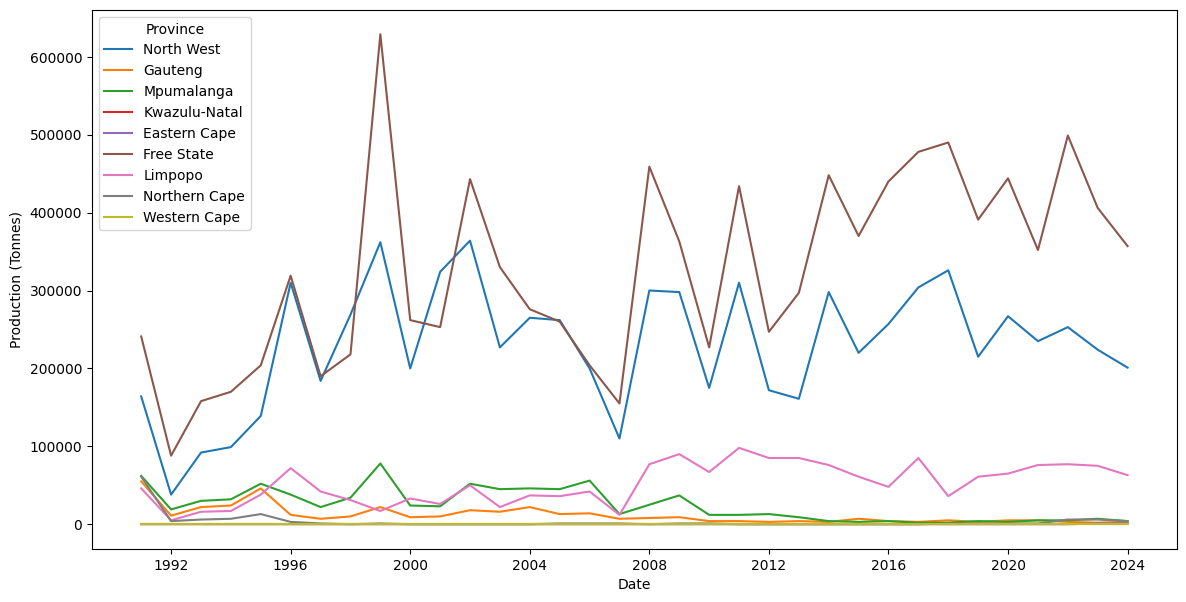

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y=TARGET_VARIABLE, hue="Province")

In [7]:
# Calculate the total production for each date
total_production = cleaned_df.groupby(cleaned_df.index)[
    "Production (Tonnes)"
].transform("sum")

# Calculate the percentage split by Province for each date
cleaned_df["Percentage Split"] = (
    cleaned_df["Production (Tonnes)"] / total_production
) * 100

# Format the 'Percentage Split' column to 2 decimal places
cleaned_df["Percentage Split"] = cleaned_df["Percentage Split"].round(2)

# Calculate the 2-year, 3-year, and 5-year rolling sums
cleaned_df["2-Year Total"] = cleaned_df.groupby("Province")[
    "Production (Tonnes)"
].transform(lambda x: x.rolling(window=2, min_periods=1).sum())
cleaned_df["3-Year Total"] = cleaned_df.groupby("Province")[
    "Production (Tonnes)"
].transform(lambda x: x.rolling(window=3, min_periods=1).sum())
cleaned_df["5-Year Total"] = cleaned_df.groupby("Province")[
    "Production (Tonnes)"
].transform(lambda x: x.rolling(window=5, min_periods=1).sum())

# Calculate the percentage splits for the 2-year, 3-year, and 5-year totals
cleaned_df["2-Year Percentage Split"] = (
    cleaned_df["2-Year Total"]
    / cleaned_df.groupby(cleaned_df.index)["2-Year Total"].transform("sum")
) * 100
cleaned_df["3-Year Percentage Split"] = (
    cleaned_df["3-Year Total"]
    / cleaned_df.groupby(cleaned_df.index)["3-Year Total"].transform("sum")
) * 100
cleaned_df["5-Year Percentage Split"] = (
    cleaned_df["5-Year Total"]
    / cleaned_df.groupby(cleaned_df.index)["5-Year Total"].transform("sum")
) * 100

# Format the new percentage split columns to 2 decimal places
cleaned_df["2-Year Percentage Split"] = cleaned_df["2-Year Percentage Split"].round(2)
cleaned_df["3-Year Percentage Split"] = cleaned_df["3-Year Percentage Split"].round(2)
cleaned_df["5-Year Percentage Split"] = cleaned_df["5-Year Percentage Split"].round(2)

# Display the dataframe with the new columns
cleaned_df[cleaned_df["Province"] == "Free State"].tail()

,Province,Production (Tonnes),Percentage Split,2-Year Total,3-Year Total,5-Year Total,2-Year Percentage Split,3-Year Percentage Split,5-Year Percentage Split
Date,,,,,,,,,
2020-01-01,Free State,444000,56.56,835000.0,1325000.0,2243000.0,57.19,57.11,56.86
2021-01-01,Free State,352000,52.23,796000.0,1187000.0,2155000.0,54.56,55.62,55.74
2022-01-01,Free State,499000,59.19,851000.0,1295000.0,2176000.0,56.10,56.26,56.71
2023-01-01,Free State,406000,56.31,905000.0,1257000.0,2092000.0,57.86,56.17,56.57
2024-01-01,Free State,357000,56.40,763000.0,1262000.0,2058000.0,56.35,57.44,56.29


<Figure size 1400x700 with 0 Axes>

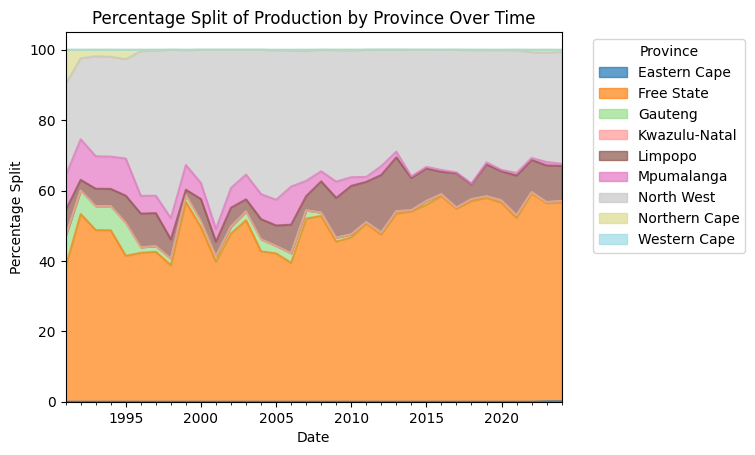

In [8]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1400x700 with 0 Axes>

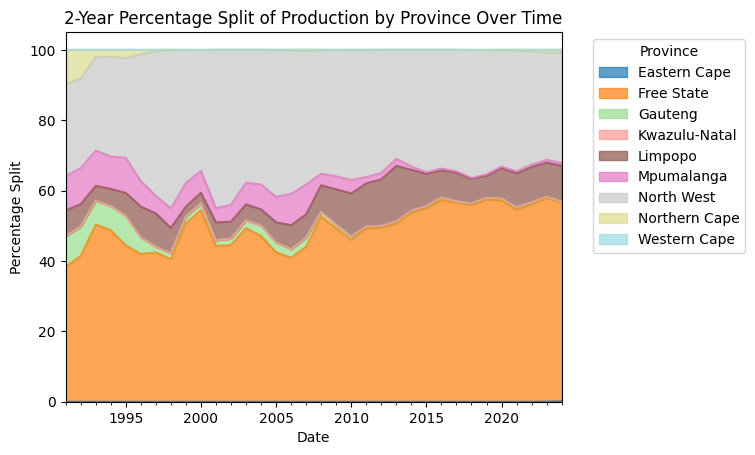

In [9]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="2-Year Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("2-Year Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1400x700 with 0 Axes>

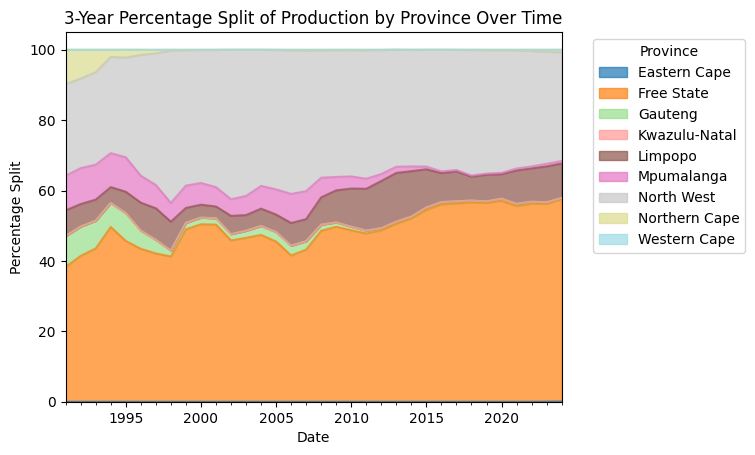

In [10]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="3-Year Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("3-Year Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1400x700 with 0 Axes>

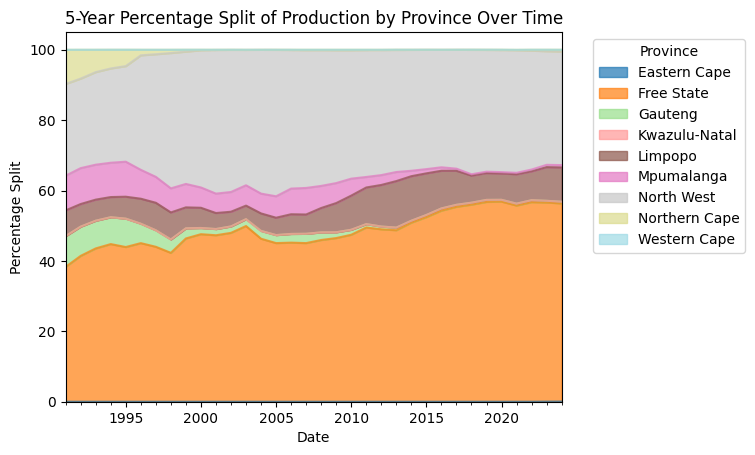

In [11]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="5-Year Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("5-Year Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

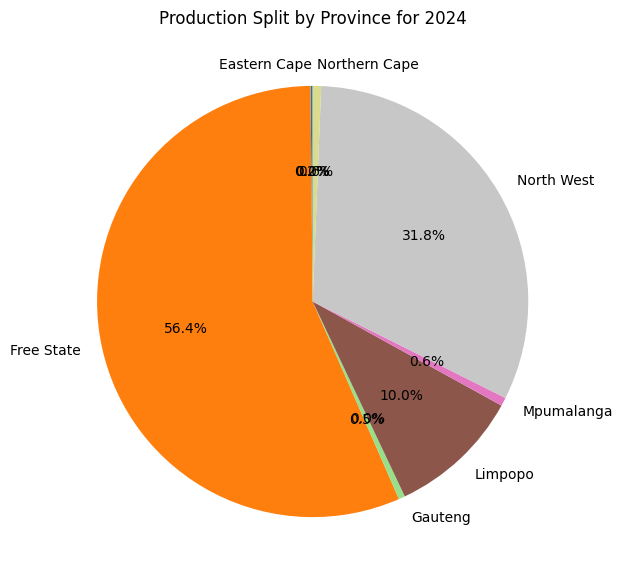

In [12]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")[
    "Production (Tonnes)"
].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

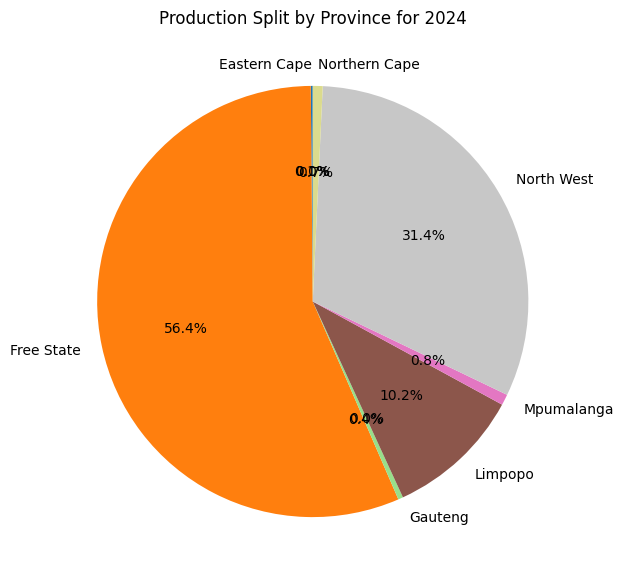

In [13]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["2-Year Total"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

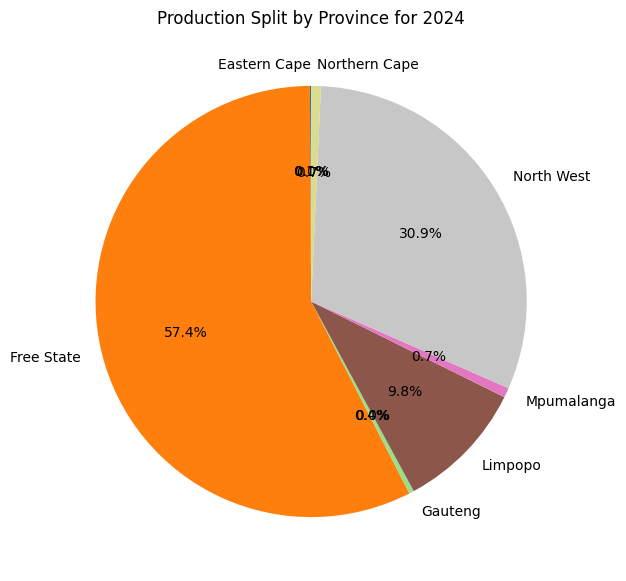

In [14]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["3-Year Total"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

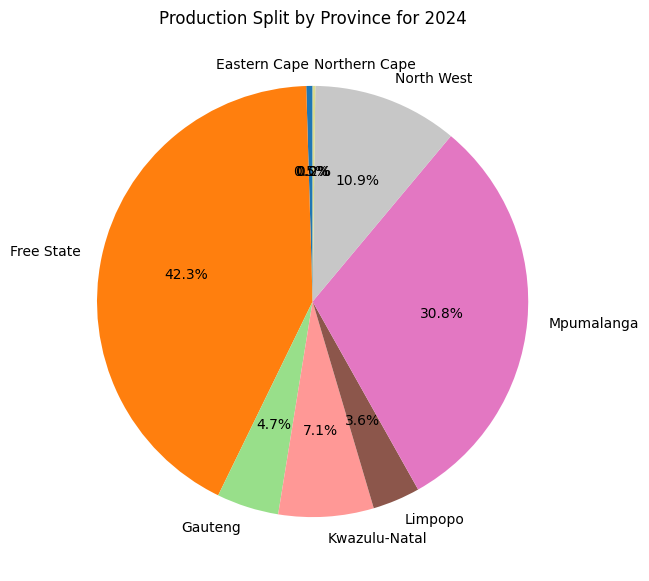

In [17]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["5-Year Total"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

In [15]:
chosen_splits_df = cleaned_df[cleaned_df.index.year == YEAR][
    ["Province", "2-Year Percentage Split"]
]
chosen_splits_df.rename(
    columns={"2-Year Percentage Split": "Percentage Split"}, inplace=True
)
chosen_splits_df

,Province,Percentage Split
Date,,
2024-01-01,Eastern Cape,0.15
2024-01-01,Western Cape,0.00
2024-01-01,Northern Cape,0.74
2024-01-01,Free State,56.35
2024-01-01,Kwazulu-Natal,0.00
2024-01-01,Mpumalanga,0.81
2024-01-01,Limpopo,10.19
2024-01-01,Gauteng,0.37
2024-01-01,North West,31.39


In [16]:
os.chdir(MODEL_PATH)
chosen_splits_df.to_excel(f"{MODEL_FILE}.xlsx")